In [1]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import Seaborn
import seaborn as sns
# This allows plots to appear on the IPython notebook.
%matplotlib inline

In [2]:
df = pd.read_csv("data/riyadh_route_edges_am.txt", sep=" ", index_col=0)
print df["travel_time"].head(2)
df.head(1)

eid
101      0.268594
20415    1.238560
Name: travel_time, dtype: float64


source  target  volume  capacity       voc  degree  free_travel_time  \
eid                                                                         
101       1       2  67.222      2850  0.023587     158          0.268594   

     travel_time  
eid               
101     0.268594

In [3]:
# Let's define an empty undirected graph "RG".
RG = nx.Graph()
# We also define the values dictionary for the "edge attributes"
keys = ['volume', 'capacity', 'voc', 'degree', 'free_travel_time', 'travel_time']
for row in df.itertuples(index=False):    
    values = row[2:]    
    # We create a dictionary "edge_attributes" with the keys and row values
    edge_attributes = dict(zip(keys, values))    
    my_tuple = (row[0], row[1])   
    # We add the edge to the graph use "add_edge" function
    RG.add_edge(*my_tuple, attr_dict=edge_attributes)

# ******How to call nodes, edges, and their attributes******************************************
print "*1. "+str(RG.edges(1))     # call all edges starting from node_1
print "*2. "+str(RG.nodes()[:3])  # call first 3 nodes 
print "*3. "+str(RG.edges()[:5]) + "**" + str(RG.edges()[3:5])
print "*4. "+str(RG[1][2])   # call edge (1,2)
print "*5. "+str(RG[1][2]["travel_time"]) +" "+ str(RG[2][1]["travel_time"]) # call edge (1,2) attribute "travel_time"
print "*6. "+str(RG.node[1]) # call node_1 attributes

*1. [(1, 2), (1, 5748), (1, 9437)]
*2. [1, 2, 3]
*3. [(1, 2), (1, 5748), (1, 9437), (2, 7438), (2, 9950)]**[(2, 7438), (2, 9950)]
*4. {'capacity': 2850, 'degree': 369, 'voc': 0.073342999999999992, 'volume': 209.02700000000002, 'travel_time': 0.268596, 'free_travel_time': 0.268594}
*5. 0.268596 0.268596
*6. {}


{1: <matplotlib.text.Text at 0x11ddbfa50>,
 2: <matplotlib.text.Text at 0x11ddbfbd0>,
 5748: <matplotlib.text.Text at 0x11ddd6050>,
 9437: <matplotlib.text.Text at 0x11ddd6490>}

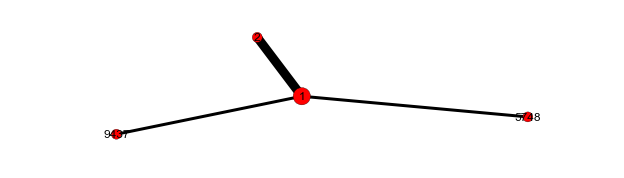

In [4]:
G = nx.Graph()                  # build an empty graph G by nx.Graph() function
G.add_edges_from(RG.edges(1))   # add all edges start from node_1 to G graph as G's edges
degrees_G = nx.degree(G)        # caculate degrees of nodes in G graph
node_sizes = [v*100 for v in degrees_G.values()] # degrees_G.values() request all the values in dictionary degrees_G
node_colors = range(len(G.nodes()))
weight = [w*0.03 for w in node_sizes]

plt.figure(figsize=(8,2))       # build an empty graphy plot
P = nx.spring_layout(G);        # generate random layout position for nodes in graph G plot

nx.draw(G, pos=P, node_size=node_sizes,width=weight,node_color="red")
nx.draw_networkx_labels(G,pos=P) # semicolon suppresses output

In [5]:
# Read dataframe of node with coordinates
nodes_df = pd.read_csv("data/riyadh_nodes.txt", sep=" ", index_col=0)
nodes_df.head(1)

st_x       st_y
id                      
1   46.849302  24.701475

In [6]:
loc_dict = {}
for node_id in RG.nodes():
    # df.loc[row_indexer,column_indexer]; df.loc[x,y] is a locator look for certain row x and column y
    loc_dict[node_id] = (float(nodes_df.loc[[node_id]]['st_x']), float(nodes_df.loc[[node_id]]['st_y']))
    # or the other way round, just simply call the dataframe by column name and row number
    RG.node[node_id]["coordinate"] = (nodes_df['st_x'][node_id], nodes_df['st_y'][node_id])

print RG.node[1]                # call attribute dictionary of node_1
print RG.node[1]["coordinate"]  # call value of key coordinate of node_1

{'coordinate': (46.849302248324101, 24.701475446932697)}
(46.849302248324101, 24.701475446932697)


In [33]:
# Analysis the degrees, and centrality use "nx.degree()" and "nx.degree_centrality" function        
degrees = nx.degree(RG)
centralities= nx.degree_centrality(RG)
# degrees, centralities are dictionary, we need to call their all values as new lists
node_centrality=[round((centralities[u]*10000),2) for u in centralities]
node_degree = [i for i in degrees.values()]

#print node_centrality
#print node_degree
print "Done with process"

Done with process


In [34]:
# ****Right way to call edge, node attributes as visualization reference****
# colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]
# nx.draw(G, pos, edges=edges, edge_color=colors, width=weights)

import matplotlib.cm as cm # import the colormap library

node_colors = range(len(RG.nodes())) # plt.cm.coolwarm() is a function change value to color from cool-warm
node_sizes = node_centrality
edges = RG.edges()
weights = [RG[u][v]["volume"]*0.0009 for u,v in edges]
edge_colors = plt.cm.coolwarm(np.log(np.log(weights)))

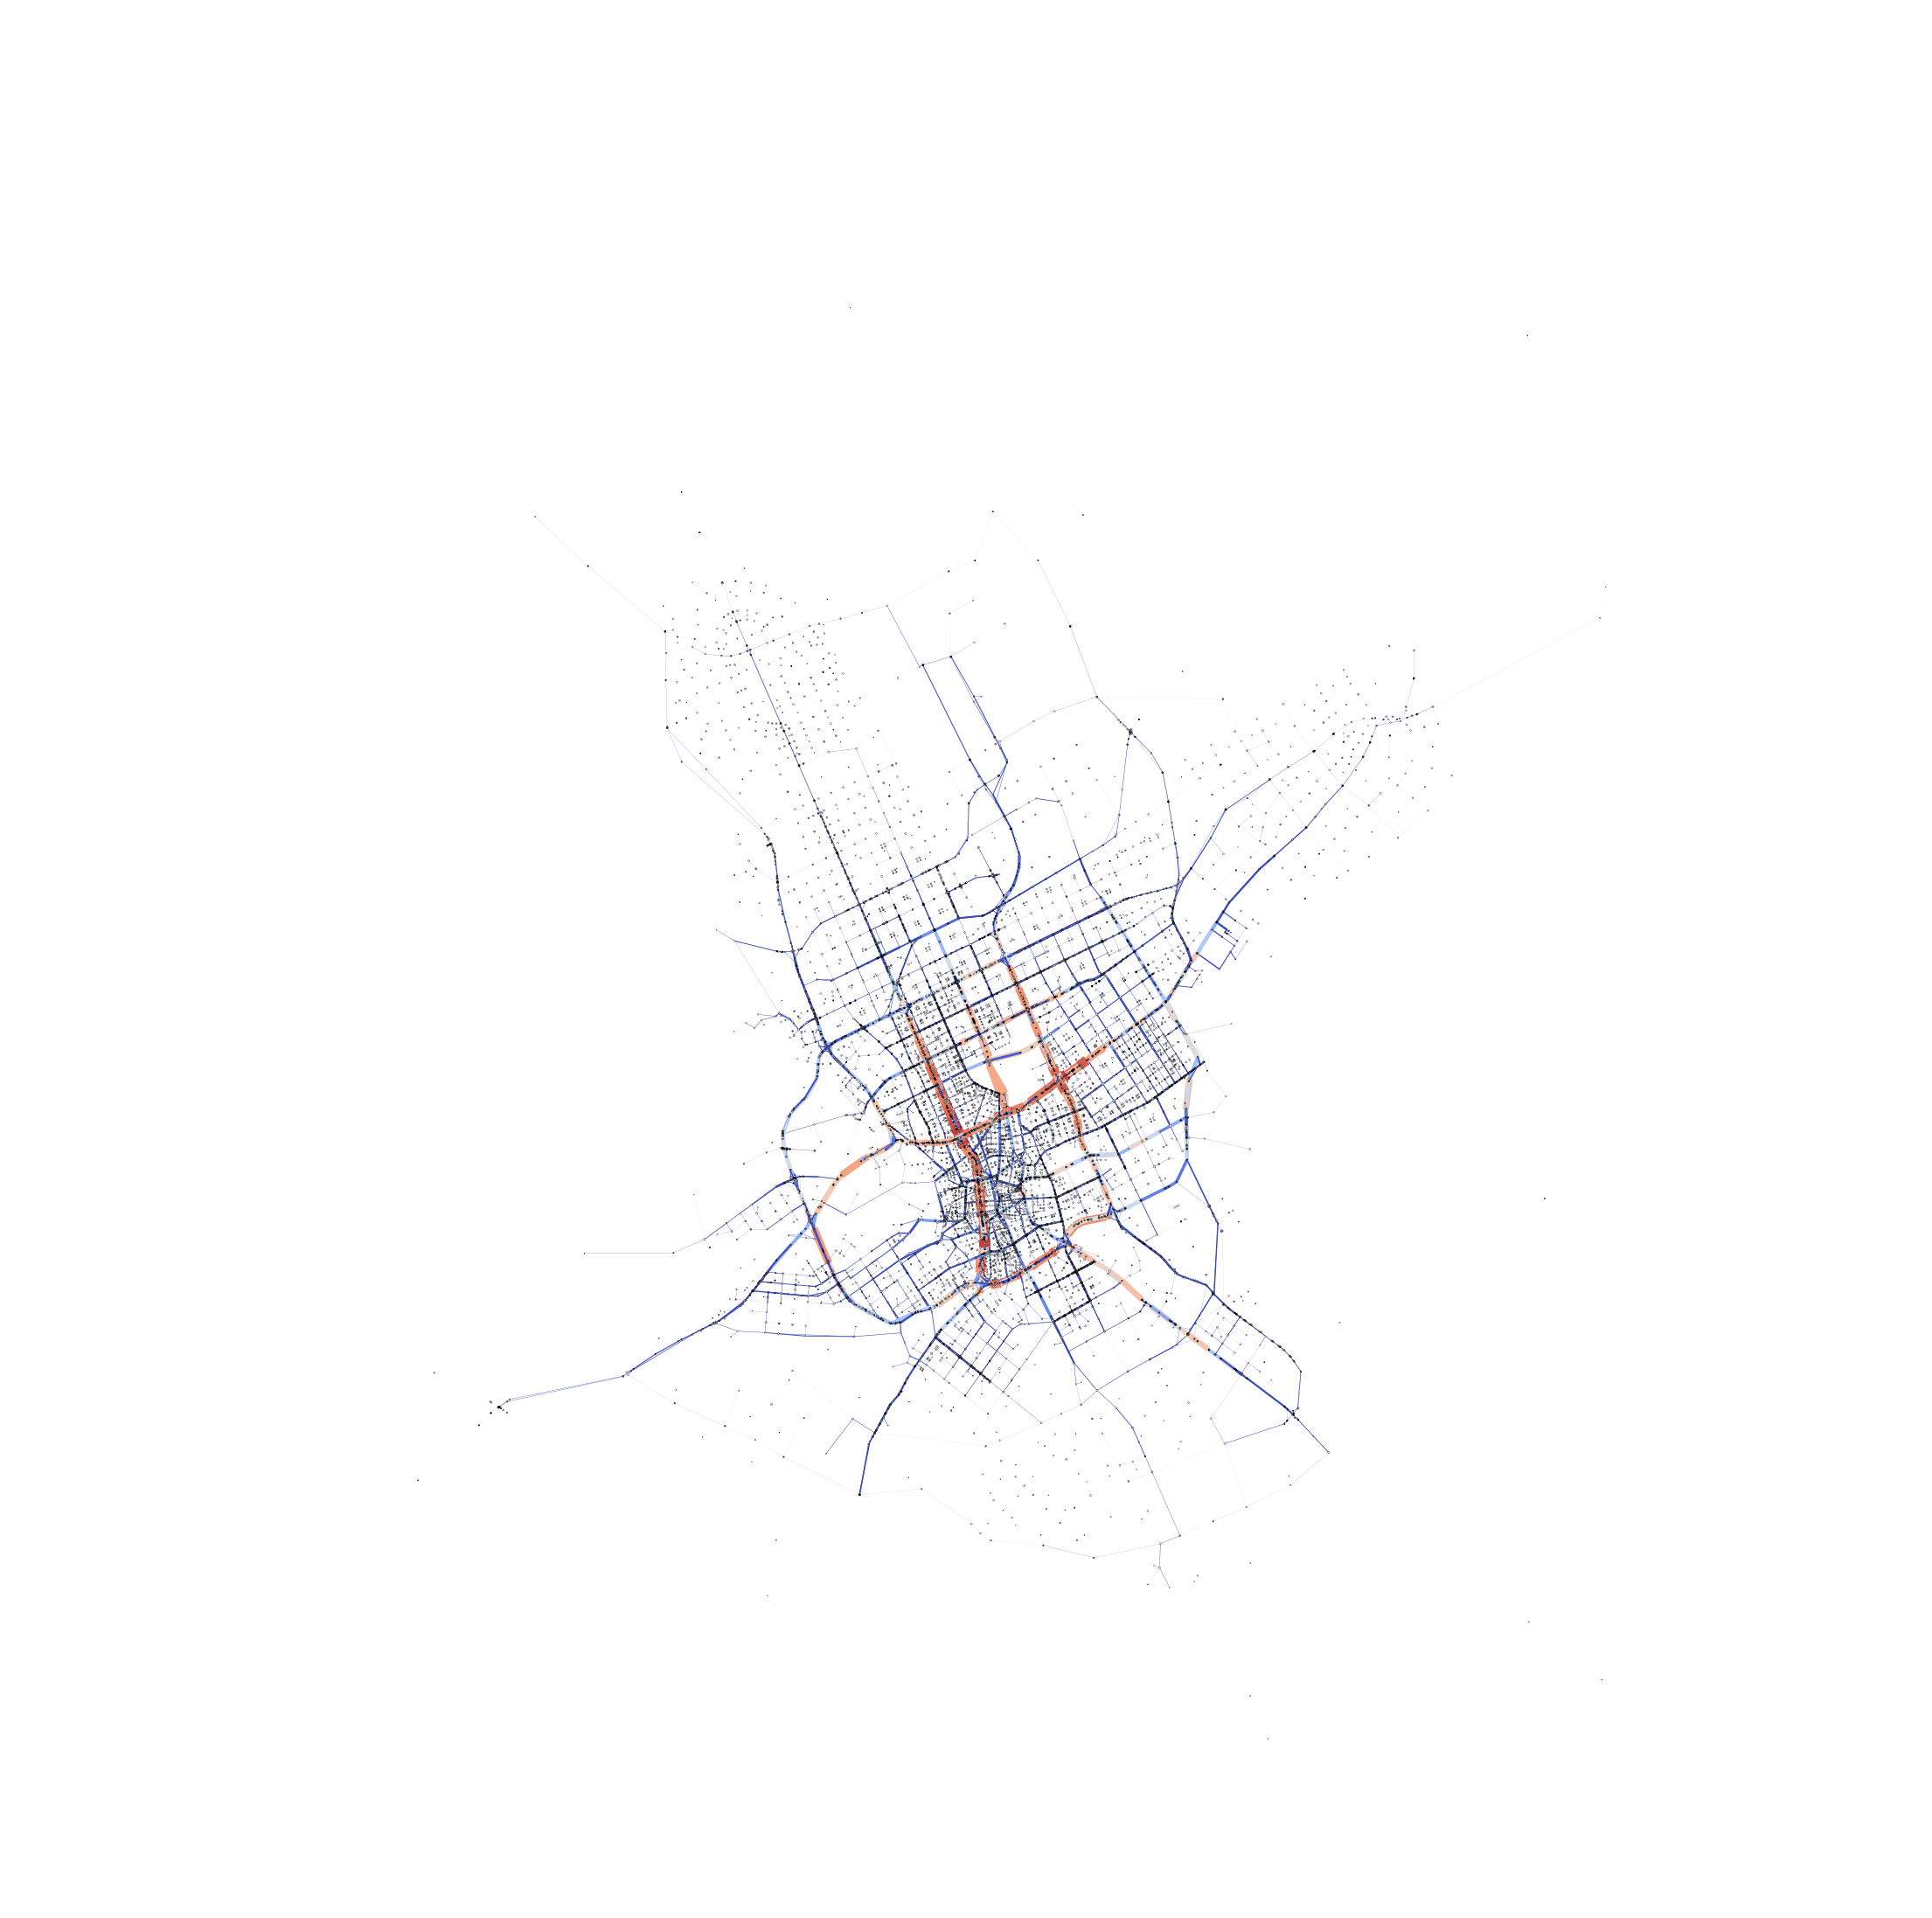

In [37]:
plt.figure(figsize=(30,30))
nx.draw(RG, pos=loc_dict, node_size=node_sizes, width=weights_o, node_color=node_colors, edge_color = edge_colors);
##nx.draw_networkx_labels(RG, pos=loc_dict); # semicolon suppresses output

In [38]:
# If I pick any two intersections, is it possible to find a route
# between them? Check if the network is connected.
print "*Is the road network connected? "+ str(nx.is_connected(RG))

*Is the road network connected? True


In [146]:
# use nx.dijkstra_path(G,node_start,node_end, weight) to caculate shortest paths
import json
node_list = [1]
for start in node_list:
    ##print "*1. Start Node: " + str(start) 
    path_dict = {start:[]}
    for end in RG.nodes()[:600]:  # [:x] control how many nodes in loop as end_point
        try:
            short_path = nx.dijkstra_path(RG, start, end, weight='travel_time')
            path_dict[start].append({end:short_path})
            ##print "*1.1 [start, End]: " + str([start, end])
            ##print "*1.2 Shortest path is: "+str(short_path)
            ##print "*1.3 Record dictionary is: "+str(path_dict)
            ##print "\n"
        except:
            pass
    ##print path_dict
    with open("Json/"+str(start)+".txt", "w") as text_file:
        text_file.write(json.dumps(path_dict))
        print "Done writting with Start Node: " + str(start) + "\n"

#print path_dict

Done writting with Start Node: 1



In [147]:
start_all=[1]

# Let's define a new empty undirected graph "Shortest_RG".
Shortest_RG = nx.Graph()

sum_time = {}
tmp_edges = []

for i in start_all:
    for j in range(len(path_dict[i])):        
        tmp_dict= path_dict[i][j]
        tmp= tmp_dict.values()
        tmp_list= tmp[0]
        #print "1* i="+str(i) + ", j="+str(j)+ ", "+str(tmp_dict)+", list length="+str(len(tmp_list))        
        time_list = []
        if len(tmp_list) > 1:
            for x in range(len(tmp_list)-1):
                o_id = tmp_list[x]
                d_id = tmp_list[x+1]
                ##print o_id, d_id                    
                time_list.append(round(RG[o_id][d_id]["travel_time"],2))                                
                new_edge_attr = RG[o_id][d_id]
                ##print new_edge_attr
                Shortest_RG.add_edge(*(o_id,d_id), attr_dict= new_edge_attr)
                Shortest_RG[o_id][d_id]["sum_time"]= round(sum(time_list),2)
                sum_time[(o_id,d_id)] = round(sum(time_list),2)
            ##print "2* time_list= " +str(time_list)
            ##print "3* sum_time= " +str(sum_time)
        ##print "\n"
print "Done with Caculation"

Done with Caculation


In [148]:
# Now we can add node coordinates
loc_dict = {}
for node_index in Shortest_RG.nodes():
    ##print node_index
    loc_dict[node_index] = RG.node[node_index]["coordinate"]
    Shortest_RG.node[node_index]["coordinate"] = RG.node[node_index]["coordinate"]
    ##print loc_dict[node_index]

print Shortest_RG.edge[1][9437]
print "\n"
print Shortest_RG[1][2]
print "\n"
#print Shortest_RG.edges()
print "\n"
print Shortest_RG.node[1]

{'capacity': 2850, 'degree': 244, 'voc': 0.0373543, 'sum_time': 1.35, 'volume': 106.45999999999999, 'travel_time': 1.3540299999999998, 'free_travel_time': 1.3540299999999998}


{'capacity': 2850, 'degree': 369, 'voc': 0.073342999999999992, 'sum_time': 0.27, 'volume': 209.02700000000002, 'travel_time': 0.268596, 'free_travel_time': 0.268594}




{'coordinate': (46.849302248324101, 24.701475446932697)}


In [117]:
# Learning a new function "subgraph"
# Shortest_RG = RG.subgraph(path_all_id)
##print Shortest_RG[1][9437]
##print "\n"
##print Shortest_RG.edges()
##print "\n"
##print Shortest_RG.node[1]
##print "\n"
# Caculate the degrees of each node
##degrees = []
##degrees = nx.degree(Shortest_RG)
##print degrees

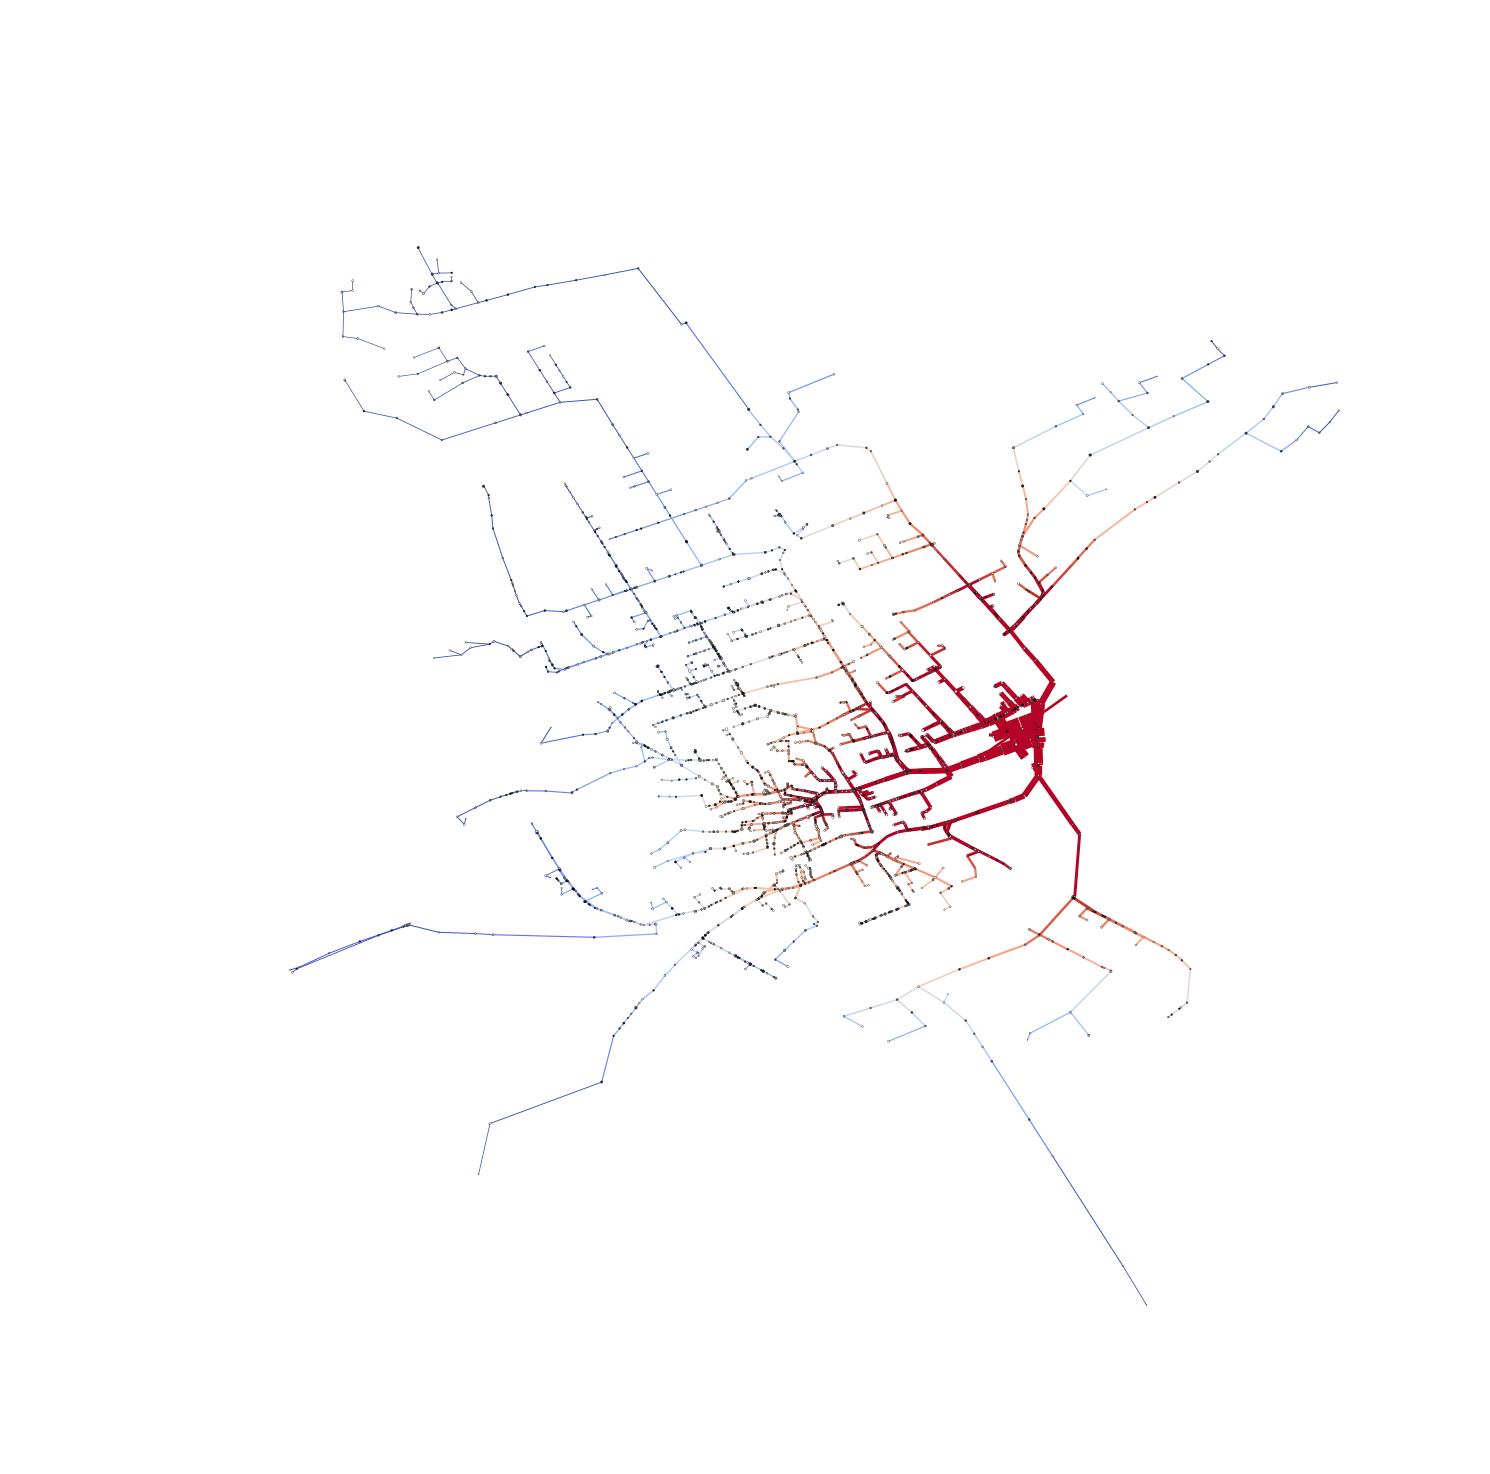

In [153]:
degrees_s = nx.degree(Shortest_RG)
node_sizes = []
for i in Shortest_RG.nodes():
    node_sizes.append(degrees[i])

node_colors = range(len(Shortest_RG.nodes()))

edges = Shortest_RG.edges()
weights = [30/Shortest_RG[u][v]["sum_time"] for u,v in edges]
#edge_colors = [Shortest_RG[u][v]["volume"] for u,v in edges]
edge_colors = plt.cm.coolwarm(np.log(weights))

##print node_sizes
##print node_colors
##print edges
##print weights
##print edge_colors

plt.figure(figsize=(20,20))

nx.draw(Shortest_RG, pos=loc_dict, node_size=node_sizes, node_color=node_colors, width=weights, edge_color=edge_colors);
#nx.draw_networkx_labels(Shortest_RG,pos=loc_dict); # semicolon suppresses output

In [ ]:
sum_time = [Shortest_RG[u][v]["sum_time"] for u,v in edges]
print sorted(sum_time)

In [ ]:
# Import json, Read riyadh network node data to get st_x, st_y (Lng, Lat)
import json
Nodes = pd.read_csv("data/riyadh_nodes.txt", sep=" ") ## <nrows> define the total rows that are read
print "* Total Nodes Numbers read is: " + str(len(Nodes)) + "\n"
Nodes.head(3)

In [ ]:
# Now construct the multi-tier dictionary structures.
# Build the 1st tier dictionary, called \"geoDataSet\".\n",
geoDataSet  = {}
geoDataSet["type"] = "FeatureCollection"
geoDataSet["features"] = []

# Build a dictionary "Coordinate" {id:[st_x,st_y]} that join node id with st_x and st_y. 
Coordinate = {}
for i in range(len(Nodes["id"])):  # i =0,1,2,...    
    idx = Nodes["id"][i]           # idx = 1,2,3,... In fact 'idx' is 'id' in dataframe "Nodes"
    Coordinate[idx]=[Nodes["st_x"][i],Nodes["st_y"][i]]

print "Length of dict 'Coordinate': " + str(len(Coordinate)) ## Test Print
print Coordinate[50]  ## Test Print"

In [ ]:
for i in range(len(Coordinate)):         # i =0,1,2,...,    
    id_o = Nodes["id"][i]                  # idx = 1,2,3,... In fact 'idx' is 'id' of dataframe "Nodes"
    print "1* When i= "+str(i)+ ", Orientation Node= "+str(id_o)
    steps = len(paths[id_o].keys())  # Count how many successful lines connected to a node, including itself
    if steps >1:
        print "2* All Paths to Ori_node are "+str(paths[id_o])  # when idx=1, len(paths[idx])=3
        ###print len(paths[idx].keys())       # when idx=1, len(path[idx].keys())=3
        destination = [] # Define a list "destination" [] that use to record all the destinations
        #print paths[idx]
        #print Coordinate[idx]

        ## Get all the nodes id that connect with node i.
        for key in paths[id_o]: # when idx=1,paths[1]={1:[1],2:[1, 2],5748:[1, 5748]}, key=1,then 2,then 5748       
            destination.append(key)               
        print "3* Total destination is"+ str(destination)+"\n"

        for index in range(steps):        
            id_des = destination[index]
            print "4.1** When index= " + str(index)+"， Destination Node= " + str(id_des)
            tmp_dict = {}
            tmp_dict["type"] = "Feature"
            tmp_dict["geometry"] = {}
            tmp_dict["geometry"]["type"] = "LineString"
            tmp_dict["geometry"]["coordinates"] = []        
            tmp_coor=[Coordinate[id_o]] ## Already insert one origin point to avoid single point situation
            ##print "4.2** O_Node_"+str(id_des) +"'s coordination is"+ str(Coordinate[id_o])     
            for x in paths[id_o][id_des]:           
                tmp_coor.append(Coordinate[x])            
            ##print "4.3** Temporary Destination List=" + str(tmp_coor)        
            tmp_dict["geometry"]["coordinates"].append(tmp_coor)
            ##print "4.4** tmp_dict are: "+str(tmp_dict)+"\n"      
            geoDataSet["features"].append(tmp_dict)

##print "4*" + str(geoDataSet)+ "\n"

In [ ]:
print nx.single_source_shortest_path(RG, 1, cutoff=50)

import json
node_list = [1,2,50,90]
for start in RG.nodes()[:1000]:
    short_path = nx.single_source_shortest_path(RG, start, cutoff=50)
    with open("Json/cutoff/"+str(start)+".txt", "w") as text_file:
        text_file.write(json.dumps(path_dict))

In [ ]:
# Import json, Read riyadh network node data to get st_x, st_y (Lng, Lat)
import json
Nodes = pd.read_csv("data/riyadh_nodes.txt", sep=" ") ## <nrows> define the total rows that are read
print "* Total Nodes Numbers read is: " + str(len(Nodes)) + "\n"
Nodes.head(3)

In [ ]:
# Now construct the multi-tier dictionary structures.
# Build the 1st tier dictionary, called \"geoDataSet\".\n",
geoDataSet  = {}
geoDataSet["type"] = "FeatureCollection"
geoDataSet["features"] = []

# Build a dictionary "Coordinate" {id:[st_x,st_y]} that join node id with st_x and st_y. 
Coordinate = {}
for i in range(len(Nodes["id"])):  # i =0,1,2,...    
    idx = Nodes["id"][i]           # idx = 1,2,3,... In fact 'idx' is 'id' in dataframe "Nodes"
    Coordinate[idx]=[Nodes["st_x"][i],Nodes["st_y"][i]]

print "Length of dict 'Coordinate': " + str(len(Coordinate)) ## Test Print
print Coordinate[50]  ## Test Print"

In [ ]:
for i in range(len(Coordinate)):         # i =0,1,2,...,    
    id_o = Nodes["id"][i]                  # idx = 1,2,3,... In fact 'idx' is 'id' of dataframe "Nodes"
    print "1* When i= "+str(i)+ ", Orientation Node= "+str(id_o)
    steps = len(paths[id_o].keys())  # Count how many successful lines connected to a node, including itself
    if steps >1:
        print "2* All Paths to Ori_node are "+str(paths[id_o])  # when idx=1, len(paths[idx])=3
        ###print len(paths[idx].keys())       # when idx=1, len(path[idx].keys())=3
        destination = [] # Define a list "destination" [] that use to record all the destinations
        #print paths[idx]
        #print Coordinate[idx]

        ## Get all the nodes id that connect with node i.
        for key in paths[id_o]: # when idx=1,paths[1]={1:[1],2:[1, 2],5748:[1, 5748]}, key=1,then 2,then 5748       
            destination.append(key)               
        print "3* Total destination is"+ str(destination)+"\n"

        for index in range(steps):        
            id_des = destination[index]
            print "4.1** When index= " + str(index)+"， Destination Node= " + str(id_des)
            tmp_dict = {}
            tmp_dict["type"] = "Feature"
            tmp_dict["geometry"] = {}
            tmp_dict["geometry"]["type"] = "LineString"
            tmp_dict["geometry"]["coordinates"] = []        
            tmp_coor=[Coordinate[id_o]] ## Already insert one origin point to avoid single point situation
            ##print "4.2** O_Node_"+str(id_des) +"'s coordination is"+ str(Coordinate[id_o])     
            for x in paths[id_o][id_des]:           
                tmp_coor.append(Coordinate[x])            
            ##print "4.3** Temporary Destination List=" + str(tmp_coor)        
            tmp_dict["geometry"]["coordinates"].append(tmp_coor)
            ##print "4.4** tmp_dict are: "+str(tmp_dict)+"\n"      
            geoDataSet["features"].append(tmp_dict)

        ##print "4*" + str(geoDataSet)+ "\n"

In [ ]:
json.dumps(geoDataSet)